In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("loan_data.csv")
df.head(3)

,race,gender,date,zip,income,type,term,interest,principal,approved,adj_bls_2,id
0,hispanic/latino,male,2016-01-01,60623.0,72230.0,home,180,3.389672,508761,False,0.34,AP20161-0-2
1,other,male,2013-03-01,60625.0,18543.0,home,360,0.277318,119738,False,0.14,AP20133-1-23
2,other,male,2011-11-01,60623.0,30228.0,home,240,4.398939,265779,False,0.08,AP201111-2-22


In [2]:
df.isnull().sum()


race          30
gender        18
date           0
zip           31
income       250
type           0
term           0
interest       0
principal      0
approved       0
adj_bls_2      0
id             0
dtype: int64

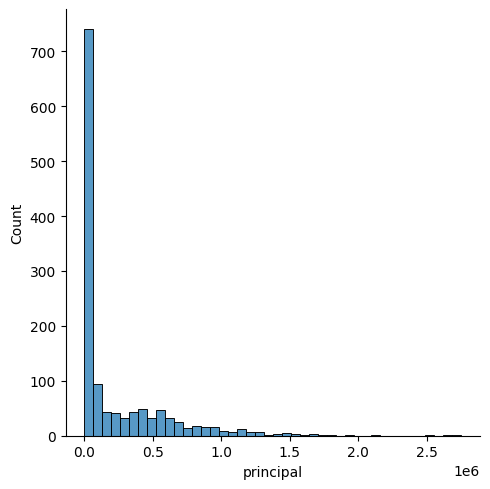

In [4]:
sns.displot(x="principal",data=df)
plt.show()

In [5]:
df.describe()

,zip,income,term,interest,principal,adj_bls_2
count,1276.000000,1057.000000,1307.000000,1307.000000,1.307000e+03,1307.000000
mean,60622.147335,56449.816462,145.051262,6.178482,2.339360e+05,0.616442
std,7.673959,51663.344437,122.389180,3.998272,3.598328e+05,0.669918
min,60611.000000,58.000000,12.000000,0.113993,1.100000e+01,0.070000
25%,60615.000000,21802.000000,60.000000,3.706491,1.615000e+04,0.110000
50%,60623.000000,42563.000000,72.000000,5.351268,4.310800e+04,0.240000
75%,60625.000000,74677.000000,240.000000,7.138273,3.753060e+05,1.150000
max,60637.000000,354654.000000,360.000000,27.375003,2.750416e+06,2.270000


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss=StandardScaler()
ss.fit(df[["principal"]])


StandardScaler()

In [9]:
df["principal_ss"]=pd.DataFrame(ss.transform(df[["principal"]]),columns=["x"])

In [18]:
df.describe()

,zip,income,term,interest,principal,adj_bls_2,principal_ss
count,1276.000000,1057.000000,1307.000000,1307.000000,1.307000e+03,1307.000000,1.307000e+03
mean,60622.147335,56449.816462,145.051262,6.178482,2.339360e+05,0.616442,3.805508e-17
std,7.673959,51663.344437,122.389180,3.998272,3.598328e+05,0.669918,1.000383e+00
min,60611.000000,58.000000,12.000000,0.113993,1.100000e+01,0.070000,-6.503426e-01
25%,60615.000000,21802.000000,60.000000,3.706491,1.615000e+04,0.110000,-6.054740e-01
50%,60623.000000,42563.000000,72.000000,5.351268,4.310800e+04,0.240000,-5.305272e-01
75%,60625.000000,74677.000000,240.000000,7.138273,3.753060e+05,1.150000,3.930272e-01
max,60637.000000,354654.000000,360.000000,27.375003,2.750416e+06,2.270000,6.996147e+00


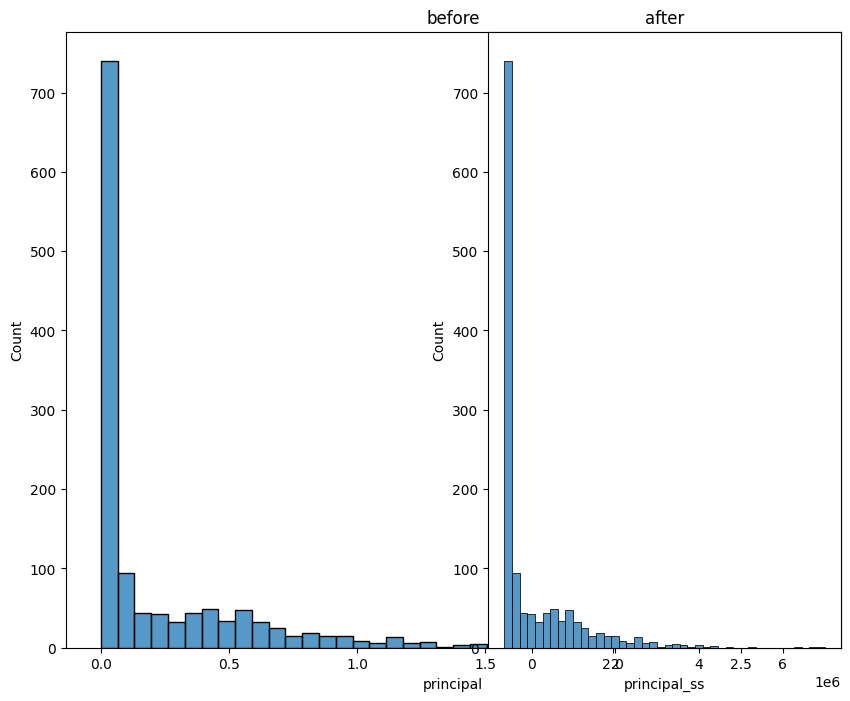

In [22]:
plt.figure(figsize=(10,8))
plt.subplot(1, 1, 1)
plt.title("before")
sns.histplot(x="principal",data= df)

plt.subplot(1,2,2)
plt.title("after")
sns.histplot(x="principal_ss",data=df)
plt.show()